# Central Limit Theorem experiment
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Define considered distribution

In [3]:
# Defined distribution is not properly normalised
# Instead, maximum value is set to 1
# Domain:       -1 < x < 1

def mypdf(x):
    val = 1 - np.sqrt(1 - (1-np.abs(x))**2)
    return val
    


### (3) Generate a set of random variables from given distribution

In [60]:
# Number of generations

Nmc = 1000000

# Generate uniform distribution

x_tab = np.random.uniform(-1., 1., size=Nmc)

# von Neumann Acceptance–Rejection Technique

r_tab = np.random.uniform(size=Nmc)

w_tab = r_tab < mypdf(x_tab)



### (4) Plot results

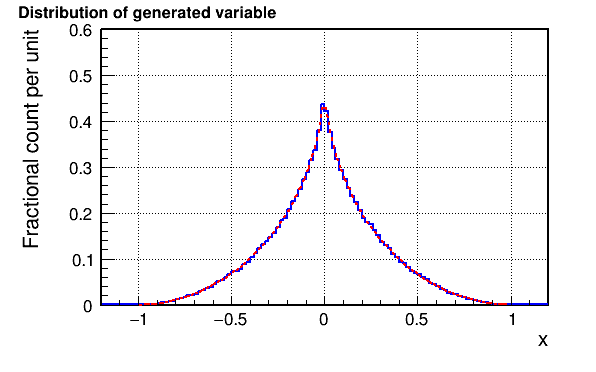

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cexp
Warning in <TROOT::Append>: Replacing existing TH1: hexp (Potential memory leak).
Info in <TCanvas::Print>: png file generation2_1000000.png has been created


In [61]:
# Lin scale

gStyle.SetOptLogy(0)

# Create plot canvas

cexp = TCanvas('cexp')
   
# Create result histogram

Xmax=1.2
Nbin = 120
dX=2.*Xmax/Nbin

hexp = TH1D('hexp','Distribution of generated variable',Nbin, -Xmax, Xmax)

# Fill histogram

w = 1./dX/Nmc

for itry in range(Nmc):
    if(w_tab[itry]): hexp.Fill(x_tab[itry],w)

# Axis description

hexp.GetXaxis().SetTitle("x")
hexp.GetYaxis().SetTitle("Fractional count per unit")

# Show histogram statistics

hexp.SetStats(0)

# Plot style

hexp.SetMarkerStyle(20)
hexp.SetMaximum(0.6)
hexp.SetMinimum(0.)
hexp.DrawCopy('HIST')

# Expected dependence (same PDF, but different call)

def myPDF(x, par):
#    val = 1 - np.sqrt(1 - (1-np.abs(x))**2)
    val = 1. - sqrt(1-(1-abs(x[0]))**2)
    return par[0]*val

# Define user function

fexp=TF1("fexp",myPDF,-1.,1.,1)
fexp.SetParameter(0,0.5)
fexp.SetNpx(100)
fexp.SetTitle("Expected distribution")
fexp.SetLineStyle(2)
fexp.SetLineColor(2)
fexp.DrawCopy("Lsame")

cexp.Update()
fname = 'generation2_'+str(Nmc)+'.png'
cexp.Print(fname)

Image(filename=fname)

In [62]:
print('Generation efficiency: ',np.sum(w_tab)/Nmc)

Generation efficiency:  0.214408


In [63]:
print('Expected efficiency: ',1.-np.pi/4.)

Expected efficiency:  0.21460183660255172
